#MODEL TRAINING AND COMPARISON NOTEBOOK
## Author: Mathias Are, Hans Matthias Andreas




This notebook follows the regular machine learning pipeline for training two models:

  1) Model A - Match results from player attributes

  2) Model B - Match results from team attributes

Then creates matplotlib plots for comparison

In [96]:
#Imports


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import files

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import plot_roc_curve,roc_curve,plot_confusion_matrix,roc_auc_score
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from  sklearn.metrics import recall_score

In [49]:
#For COLAB only
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [139]:
#Plotting methods

def plot_comparing_roc_curves(model_A,model_B,X_test_A,y_test_A,X_test_B,y_test_B):
  #works only with binary classification

  pred_A = model_A.predict(X_test_A)
  pred_B = model_B.predict(X_test_B)
  fig, (ax1) = plt.subplots(1)
  plt.rcParams["figure.figsize"] = (20,10)
  
  
  plot_roc_curve(model_A,X_test_A,y_test_A,ax=ax1,name="Model A")
  plot_roc_curve(model_B,X_test_B,y_test_B,ax=ax1, name="Model B")
  plt.show()

def plot_confusion_matrixes(modelA,modelB,X_test_A,y_test_A,X_test_B,y_test_B):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  plt.rcParams["figure.figsize"] = (40,10)
  fig.suptitle('Confusion matrixes on validation set')
  ax1.set_title("Model A (Players)")
  ax2.set_title("Model B (Teams)")
  plot_confusion_matrix(modelA,X_test_A,y_test_A,ax=ax1,values_format = '.5f')
  plot_confusion_matrix(modelB,X_test_B,y_test_B,ax=ax2,values_format = '.5f')
  plt.show()

def plot_label_distribution(data):
  wins,ties,losses=data.groupby("result")["id"].count()

  fig = plt.figure(figsize =(10, 7))
  fig,ax = plt.subplots()
  plt.rcParams["figure.figsize"] = (10,7)
  ax.set_title('Class distribution of predicted label')
  ax.bar(["home_team_wins","ties","away_team_wins"], (wins,ties,losses),color=['green', 'gray', 'red'],width=0.5) 
  plt.show() 

def plot_binary_label_distribution(data):
  wins,losses=data.groupby("result")["id"].count()

  fig,ax = plt.subplots()
  plt.rcParams["figure.figsize"] = (10,7)
  ax.set_title('Class distribution of predicted label')
  ax.bar(["home_team_wins","away_team_wins"], (wins,losses),color=['green', 'red'],width=0.3)

  plt.show()




In [129]:
#Class for storing results
class ModelData():
  def __init__(self,data,X_val, y_val,model):
    self.data = data
    self.X_val = X_val
    self.y_val = y_val
    self.model = model

  def calculate_characteristics(self):
    y_pred=self.model.predict(self.X_val)
    accuracy = accuracy_score(self.y_val,y_pred)
    precision = precision_score(self.y_val,y_pred,average='weighted')
    recall = recall_score(self.y_val,y_pred,average='weighted')
    return (accuracy,precision,recall)
    

#TRAINING MODEL A

In [103]:
pathToData = ... #add path



data = pd.read_csv(pathToData,delimiter=",")
data=data.drop(columns=data.columns[:25])

#data = data[data.result != 0] Uncomment for binary classification where ties are removed.


print(len(data))
X=data.drop(columns=["result"])
y=data["result"]

data

21374


In [89]:
#Correlation matrix

data.corr()

,result,home_player_1 overall_rating,home_player_1 potential,home_player_1 crossing,home_player_1 finishing,home_player_1 heading_accuracy,home_player_1 short_passing,home_player_1 volleys,home_player_1 dribbling,home_player_1 curve,home_player_1 free_kick_accuracy,home_player_1 long_passing,home_player_1 ball_control,home_player_1 acceleration,home_player_1 sprint_speed,home_player_1 agility,home_player_1 reactions,home_player_1 balance,home_player_1 shot_power,home_player_1 jumping,home_player_1 stamina,home_player_1 strength,home_player_1 long_shots,home_player_1 aggression,home_player_1 interceptions,home_player_1 positioning,home_player_1 vision,home_player_1 penalties,home_player_1 marking,home_player_1 standing_tackle,home_player_1 sliding_tackle,home_player_1 gk_diving,home_player_1 gk_handling,home_player_1 gk_kicking,home_player_1 gk_positioning,home_player_1 gk_reflexes,home_player_2 overall_rating,home_player_2 potential,home_player_2 crossing,home_player_2 finishing,...,away_player_10 gk_handling,away_player_10 gk_kicking,away_player_10 gk_positioning,away_player_10 gk_reflexes,id,away_player_11 overall_rating,away_player_11 potential,away_player_11 crossing,away_player_11 finishing,away_player_11 heading_accuracy,away_player_11 short_passing,away_player_11 volleys,away_player_11 dribbling,away_player_11 curve,away_player_11 free_kick_accuracy,away_player_11 long_passing,away_player_11 ball_control,away_player_11 acceleration,away_player_11 sprint_speed,away_player_11 agility,away_player_11 reactions,away_player_11 balance,away_player_11 shot_power,away_player_11 jumping,away_player_11 stamina,away_player_11 strength,away_player_11 long_shots,away_player_11 aggression,away_player_11 interceptions,away_player_11 positioning,away_player_11 vision,away_player_11 penalties,away_player_11 marking,away_player_11 standing_tackle,away_player_11 sliding_tackle,away_player_11 gk_diving,away_player_11 gk_handling,away_player_11 gk_kicking,away_player_11 gk_positioning,away_player_11 gk_reflexes
result,1.000000,-0.010665,-0.005639,-0.027711,-0.020367,-0.029558,-0.022757,-0.012087,-0.023469,-0.009111,-0.023861,-0.027959,-0.029224,-0.006067,-0.018986,0.003426,-0.001286,-0.005547,-0.022096,0.004920,-0.003258,0.008733,-0.013357,-0.009968,0.009884,-0.015933,-0.014482,-0.031364,-0.010893,-0.006435,-0.000457,0.026227,0.031315,0.025119,0.027228,0.027025,-0.021682,-0.029065,-0.012169,-0.029976,...,-0.002957,-0.007393,-0.007325,-0.009434,-0.011641,-0.015495,-0.010913,0.011554,0.008135,-0.022284,-0.002522,0.008710,0.016726,0.006366,0.005659,0.010186,-0.000584,0.012742,0.013867,0.008405,-0.012252,0.006131,0.006006,-0.016235,-0.005465,-0.019644,0.007521,-0.020924,-0.001541,-0.007580,-0.002163,-0.008472,-0.002804,-0.004948,-0.006205,-0.007054,-0.007463,-0.019750,-0.008252,-0.010119
home_player_1 overall_rating,-0.010665,1.000000,0.761898,0.399010,0.375664,0.351195,0.514165,0.371578,0.361230,0.388178,0.392680,0.472250,0.448407,0.219205,0.222011,0.324023,0.737988,0.156454,0.466480,0.338934,0.327725,0.301439,0.459033,0.290435,0.265165,0.388693,0.425362,0.449855,0.146717,0.160565,0.121336,0.034876,0.033175,0.045352,0.023785,0.032630,0.011521,0.018690,-0.003228,-0.017231,...,0.005756,0.005124,0.003261,0.002927,-0.021672,-0.009089,-0.011517,0.002960,0.004333,0.003029,-0.000477,0.001480,0.012347,0.002572,0.002465,-0.002535,0.007195,0.000112,0.004584,0.000318,-0.006466,-0.007217,0.005721,-0.003840,0.004620,0.001493,-0.001422,0.002652,0.004557,0.006882,0.003863,0.000746,-0.003906,-0.002111,-0.003506,-0.014752,-0.018824,-0.018596,-0.015417,-0.016129
home_player_1 potential,-0.005639,0.761898,1.000000,0.345519,0.394567,0.303049,0.453072,0.348213,0.401889,0.342846,0.326236,0.409200,0.440367,0.333425,0.317568,0.321514,0.559707,0.219685,0.414224,0.208420,0.301629,0.158481,0.403227,0.177133,0.212470,0.392522,0.414903,0.414211,0.090240,0.098146,0.058256,-0.048356,-0.015046,0.092883,-0.016103,-0.017226,0.033287,0.024062,-0.002715,-0.013584,...,0.012210,0.0

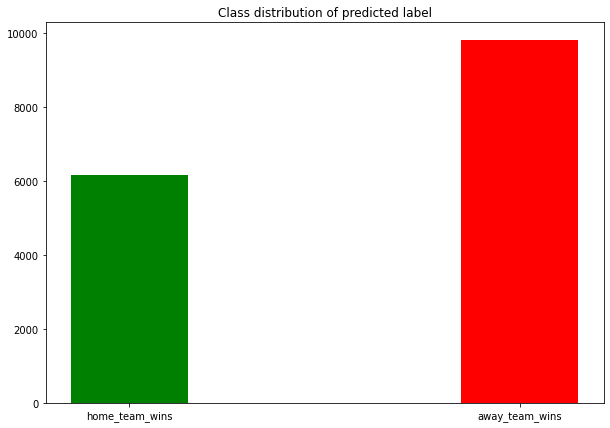

In [62]:
#If using multiclass classification with ties included:

plot_binary_label_distribution(data)


#Else:

#plot_binary_label_distribution(data)

In [104]:
#Splitting data to train, test and validtation sets

t_X,val_X,t_y,val_y=train_test_split(X,y,test_size=0.2)
train_X,test_X,train_y,test_y=train_test_split(t_X,t_y,test_size=0.2)


In [105]:
print("TRAIN SIZE: ",len(train_X),"    ",len(train_y))
print("TEST SIZE: ",len(test_X),"    ",len(test_y))
print("VALIDATION SIZE: ",len(val_X),"    ",len(val_y))


TRAIN SIZE:  13679      13679
TEST SIZE:  3420      3420
VALIDATION SIZE:  4275      4275


In [106]:
#Fitting the model


rf = RandomForestClassifier(n_estimators=200,min_samples_leaf=2)
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
#Test accuracy

y_pred=rf.predict(test_X)
score = accuracy_score(test_y,y_pred)

In [112]:
#Validation accuracy

y_valpreds = rf.predict(val_X)
val_score = accuracy_score(val_y,y_valpreds)
val_score

0.48280701754385963

In [68]:
print("RANDOM FOREST 200 trees:   " ,score)
print("VALIDATION SCORE:  ",val_score)

RANDOM FOREST 200 trees:    0.6388888888888888
VALIDATION SCORE:   0.6323529411764706


In [130]:
#Saving results

model_A = ModelData(data,val_X,val_y,rf)

In [1]:
#Get characteristics

acc,pre,rec=model_A.calculate_characteristics()


print("ACCURACY: ",acc)
print("PRECISION: ",pre)
print("RECALL: ",rec)

NameError: ignored

#TRAINING MODEL B


In [133]:

#READ IN DATA

data = pd.read_csv("/content/drive/MyDrive/data/data_model_B.csv")
print(len(data))
#data = data[data.result != 0] Uncomment for binary classification where ties are removed.
X=data.drop(columns=["result", "home_team_goal", "away_team_goal"])
y=data["result"]
data

25659


,Unnamed: 0,year,home_team,away_team,home_team_goal,away_team_goal,result,home_team year,home_team buildUpPlaySpeed,home_team buildUpPlayDribbling,home_team buildUpPlayPassing,home_team chanceCreationPassing,home_team chanceCreationCrossing,home_team chanceCreationShooting,home_team defencePressure,home_team defenceAggression,home_team defenceTeamWidth,away_team year,away_team buildUpPlaySpeed,away_team buildUpPlayDribbling,away_team buildUpPlayPassing,away_team chanceCreationPassing,away_team chanceCreationCrossing,away_team chanceCreationShooting,away_team defencePressure,away_team defenceAggression,away_team defenceTeamWidth
0,0,2008,9987,9993,1,1,0,2009,45,30.0,45,50,35,60,70,65,70,2009,35,30.0,35,45,40,50,70,70,70
1,1,2008,10000,9994,0,0,0,2009,65,30.0,60,60,40,50,70,60,70,2009,60,30.0,60,50,40,50,65,65,70
2,2,2008,9984,8635,0,3,-1,2009,45,30.0,35,70,45,55,65,60,70,2009,50,30.0,35,70,50,60,70,50,70
3,3,2008,9991,9998,5,0,1,2009,70,30.0,65,60,50,60,45,50,40,2011,50,30.0,50,55,48,46,46,45,47
4,4,2008,8203,8342,1,1,0,2009,65,30.0,60,50,40,50,60,70,60,2009,35,30.0,40,45,50,45,60,70,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25654,25654,2015,10243,10191,3,3,0,2015,62,49.0,46,47,50,54,47,43,56,2015,58,59.0,35,64,36,66,47,45,53
25655,25655,2015,10190,10191,1,0,1,2015,52,46.0,48,39,39,37,40,36,52,2015,58,59.0,35,64,36,66,47,45,53
25656,25656,2015,9824,10199,1,2,-1,2015,53,32.0,56,38,53,46,42,33,58,2015,63,51.0,51,54,40,66,48,53,50
25657,25657,2015,9956,10179,2,0,1,2015,50,60.0,54,52,54,46,36,43,47,2015,61,57.0,37,62,50,53,45,47,54


In [134]:
#Splitting data to train, test and validtation sets

t_X,val_X,t_y,val_y=train_test_split(X,y,test_size=0.2)
train_X,test_X,train_y,test_y=train_test_split(t_X,t_y,test_size=0.2)

In [135]:
print("TRAIN: ",len(train_X),"    ",len(train_y))
print("TEST: ",len(test_X),"    ",len(test_y))
print("VALIDATION: ",len(val_X),"    ",len(val_y))

TRAIN:  16421      16421
TEST:  4106      4106
VALIDATION:  5132      5132


In [136]:
#Fitting the model

rf = RandomForestClassifier(n_estimators=200)
rf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
#Test and validation accuracy

y_pred=rf.predict(test_X)
score = accuracy_score(test_y,y_pred)

print("RANDOM FOREST 200 trees:   " ,score)

RANDOM FOREST 200 trees:    0.6398955272608554


In [ ]:
y_valpreds = rf.predict(val_X)
val_score = accuracy_score(val_y,y_valpreds)
val_score

In [79]:
print("RANDOM FOREST 200 trees:   " ,score)
print("VALIDATION SCORE:  ",val_score)

RANDOM FOREST 200 trees:    0.6398955272608554
VALIDATION SCORE:   0.6323529411764706


In [137]:
#Saving the model

model_B = ModelData(data,val_X,val_y,rf)

In [138]:
#Get characteristics


acc,pre,rec=model_B.calculate_characteristics()


print("ACCURACY: ",acc)
print("PRECISION: ",pre)
print("RECALL: ",rec)

(0.4573265783320343, 0.4314577776284857, 0.4573265783320343)

#PLOTTING

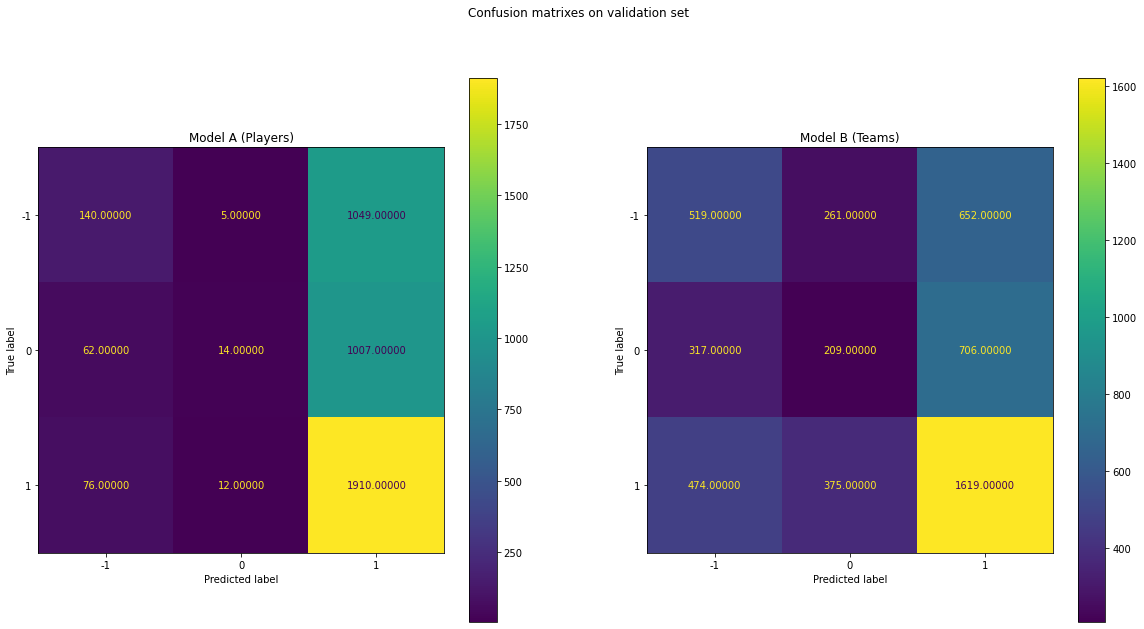

In [140]:
#Confusion matrices


plot_confusion_matrixes(model_A.model,model_B.model,model_A.X_val,model_A.y_val,model_B.X_val,model_B.y_val)

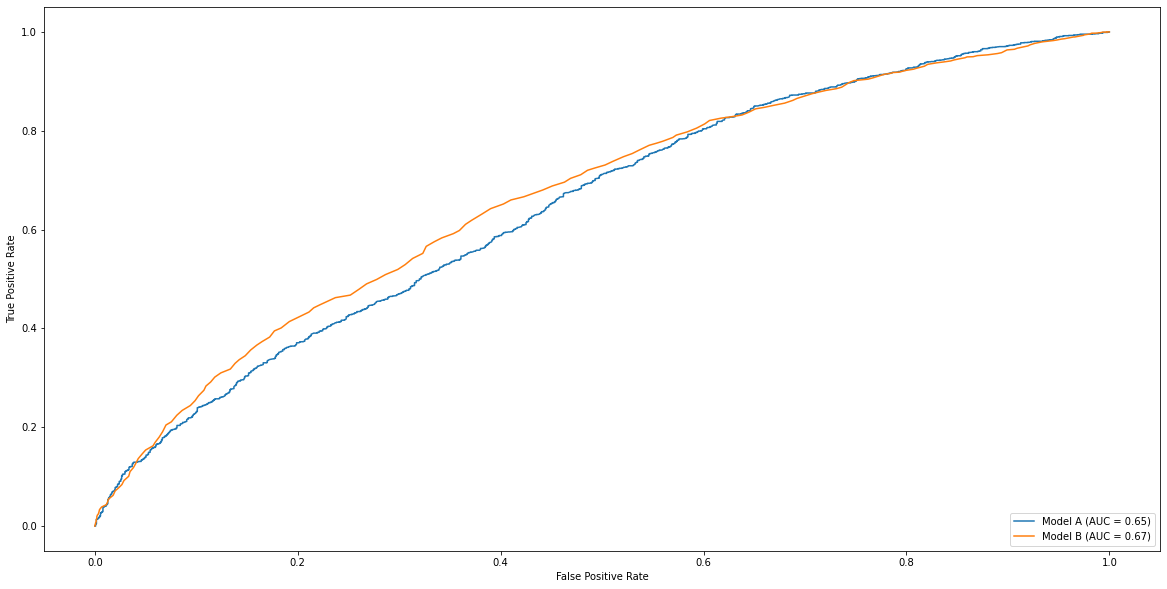

In [86]:
#ROC curves

#NB! only works with binary classification


plot_comparing_roc_curves(model_A.model,model_B.model,model_A.X_val,model_A.y_val,model_B.X_val,model_B.y_val)